outlier 1      artist_top_genre  popularity  danceability  acousticness  loudness  \
0                 5.0          48         0.666        0.8510    -6.699   
1                 3.0          30         0.710        0.0822    -5.640   
2                 NaN          40         0.836        0.2720    -7.127   
3                 NaN          14         0.894        0.7980    -4.961   
4                 3.0          25         0.702        0.1160    -6.044   
..                ...         ...           ...           ...       ...   
525               1.0          10         0.735        0.6320    -2.582   
526               1.0           0         0.602        0.1770    -6.183   
527               1.0           0         0.729        0.2380    -3.942   
528               1.0           0         0.809        0.0490    -6.547   
529               1.0           0         0.816        0.1140    -2.204   

     energy  
0     0.420  
1     0.683  
2     0.564  
3     0.611  
4     0.833  
..   

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

gh      artist_top_genre  popularity  danceability  acousticness  loudness  \
0                   5          48         0.666        0.8510    -6.699   
1                   3          30         0.710        0.0822    -5.640   
2                  14          40         0.836        0.2720    -7.127   
3                  16          14         0.894        0.7980    -4.961   
4                   3          25         0.702        0.1160    -6.044   
..                ...         ...           ...           ...       ...   
525                 1          10         0.735        0.6320    -2.582   
526                 1           0         0.602        0.1770    -6.183   
527                 1           0         0.729        0.2380    -3.942   
528                 1           0         0.809        0.0490    -6.547   
529                 1           0         0.816        0.1140    -2.204   

     energy  
0     0.420  
1     0.683  
2     0.564  
3     0.611  
4     0.833  
..      ... 

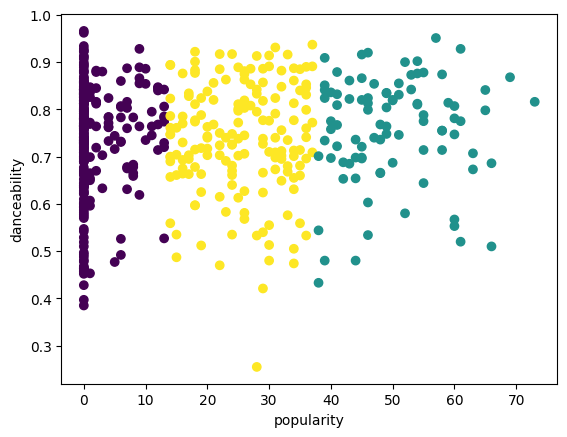

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans

le = LabelEncoder()
df = pd.read_csv("C:/Users/pc/Documents/nigerian-songs.csv")
df.head()
# Removing outliers using IQR (Interquartile Range) Method:
threshold = 1.5  # Adjust this value according to your preference
X=df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]
y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1
# Set a threshold for outliers (e.g., 1.5 * IQR)
threshold = 1.5 * IQR
# Remove outliers from the DataFrame
df_no_outliers = X[(X>= Q1 - threshold) & (X <= Q3 + threshold)]
print('outlier 1', df_no_outliers)
# scaling our data using Standardization (Z-score Scaling):
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_no_outliers)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)
print('scales 1', scaled_data)

#find how many rows are left in the dataframe 


nclusters = 2
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans
score = metrics.silhouette_score(X, y_cluster_kmeans)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print('gh',X)   
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()